# Projeto de Detecção de Defeitos em Chapas de Granito com YOLOv8
## **Dissertação de Mestrado**

**Autor**: Alexsander Alves Novaes

**Orientador**: Prof. Dr. Daniel Cruz Cavalieri

**Instituição**: IFES

**Data**: Jul/2024

## Contexto

Este projeto visa a detecção automática de defeitos em chapas de granito utilizando o modelo YOLOv8. O objetivo é desenvolver um pipeline completo e replicável para identificar diferentes tipos de defeitos em imagens de chapas de granito. Este documento é parte integrante da dissertação de mestrado e contém todos os passos necessários para executar e replicar o projeto, desde a configuração do ambiente até a detecção dos defeitos.

## Objetivos

1. **Configuração do Ambiente**: Carregar configurações e preparar o ambiente de trabalho.
2. **Detecção de Defeitos**: Realizar a detecção dos defeitos nas imagens utilizando o modelo YOLOv8.
3. **Geração de Relatórios**: Gerar relatórios detalhados dos defeitos detectados, incluindo informações visuais e em JSON.

## Requisitos

- Python 3.8 ou superior
- Bibliotecas presentes no arquivo `requirements.txt`
- Ferramenta para visualização de gráficos, como Jupyter Notebook ou similar

### Lista de Bibliotecas e Versões

```plaintext
ipykernel==6.29.5
jupyter==1.0.0
jupyterlab==4.2.4
matplotlib==3.9.1
opencv-python==4.10.0.84
roboflow==1.1.36
scikit-learn==1.5.1
tabulate==0.9.0
torch==2.3.1
ultralytics==8.2.60
PyYAML==6.0.1
```

## **Detectando os Defeitos e Exportando os Resultados**

Este código utiliza o modelo YOLO para detecção de defeitos em chapas de granito. A detecção é realizada em uma imagem especificada, e os resultados são organizados em um JSON, permitindo fácil integração com sistemas externos. O código também garante que os dados de múltiplas execuções sejam armazenados de maneira estruturada, atualizando informações existentes e adicionando novas conforme necessário. Para garantir a consistência dos nomes das classes, eles são carregados diretamente do arquivo YAML de configuração do modelo. Aqui estão as etapas detalhadas do processo:

1. **Configuração do Ambiente**: O modelo YOLO pré-treinado é carregado para realizar a detecção dos defeitos. Os nomes das classes são lidos diretamente do arquivo YAML de configuração do modelo.
2. **Carregamento e Preparo da Imagem**: A imagem da chapa de granito é carregada, e as dimensões são obtidas.
3. **Detecção dos Defeitos**: O modelo realiza a detecção, e os resultados são processados para obter a classe, confiança e coordenadas dos defeitos.
4. **Expansão da Área da Chapa**: A área da chapa é expandida por uma margem percentual para assegurar que todos os defeitos relevantes sejam considerados.
5. **Classificação dos Defeitos por Quadrante**: Os defeitos são classificados em quadrantes imaginários sobrepostos à área da chapa.
6. **Armazenamento dos Resultados em JSON**: Os resultados são armazenados em um arquivo JSON, atualizando entradas existentes ou adicionando novas.
7. **Visualização**: Duas imagens são geradas - a primeira é a imagem original com as detecções marcadas pelo YOLO, e a segunda é uma imagem recortada mostrando apenas a área da chapa com as margens e os defeitos considerados. Nessa segunda imagem, os quadrantes são demarcados, e a nota de cada quadrante é exibida abaixo do nome do quadrante.

### Configuração do Ambiente

Nesta etapa, carregamos as configurações e preparamos o ambiente de trabalho para a detecção de defeitos em chapas de granito. É importante garantir que todos os diretórios e arquivos necessários estejam corretamente configurados antes de prosseguir.

#### Parâmetros Ajustáveis

- **`yaml_path`**: Caminho para o arquivo de configuração do conjunto de dados (YAML). Esse arquivo contém informações sobre as classes e a estrutura do dataset.
- **`model_path`**: Caminho para o arquivo de pesos do modelo YOLOv8 treinado. Este arquivo é necessário para carregar o modelo e realizar as detecções.
- **`image_dir`**: Diretório onde as imagens a serem analisadas estão localizadas. Este é o caminho base para os arquivos de imagem.
- **`image_file`**: Nome do arquivo da imagem a ser analisada. Este parâmetro especifica qual imagem será processada pelo modelo.
- **`output_dir`**: Diretório onde as imagens resultantes serão salvas. Este é o local onde as imagens processadas, incluindo as que contêm detecções, serão armazenadas.
- **`output_image_file`**: Caminho completo do arquivo de imagem resultante. Este arquivo contém a imagem original com as detecções marcadas.
- **`cropped_image_file`**: Caminho completo do arquivo de imagem recortada. Esta imagem mostra apenas a área da chapa com os defeitos identificados e as pontuações dos quadrantes.
- **`json_filename`**: Caminho para o arquivo JSON onde os resultados das detecções serão armazenados. Este arquivo contém informações detalhadas sobre cada defeito detectado.
- **`device`**: Dispositivo onde o modelo YOLOv8 será executado. Pode ser definido como 'mps' (Metal Performance Shaders) se disponível, senão usa CPU.
- **`rows`**: Número de linhas para dividir a chapa em quadrantes. Este parâmetro determina a granulação da análise dos defeitos.
- **`cols`**: Número de colunas para dividir a chapa em quadrantes. Este parâmetro, juntamente com 'rows', define a matriz de quadrantes para a análise.
- **`margin_percentage`**: Porcentagem de margem para expansão da área da chapa. Este parâmetro é usado para garantir que a área de interesse seja suficientemente grande para capturar todos os defeitos relevantes.
- **`min_confidence_defect`**: Confiança mínima para considerar um defeito. Detecções com confiança abaixo deste valor serão desconsideradas.
- **`crop_margin_percentage`**: Porcentagem de margem para o corte da imagem. Este parâmetro define a área ao redor da chapa que será incluída na imagem recortada.
- **`penalties`**: Dicionário que define as penalidades para cada tipo de defeito. As penalidades são usadas para calcular a pontuação final da chapa com base nos defeitos detectados.

#### **Pontuação da Chapa:**

- **Pontuação da Chapa**: Pontuação final da chapa, onde 100% representa uma chapa sem defeitos e valores menores indicam a presença de defeitos.

##### **Cálculo da Pontuação:**

A pontuação da chapa é calculada com base nos defeitos detectados pelo modelo YOLO. O processo de cálculo considera a classe dos defeitos, a sua confiança, a área ocupada por eles, e a sua localização dentro da chapa. O objetivo é penalizar a chapa de acordo com a gravidade dos defeitos encontrados.

##### **Detalhamento do Cálculo:**

1. **Inicialização da Pontuação**:
   - A pontuação inicial da chapa é 100%.

2. **Penalidades**:
   - Cada tipo de defeito tem uma penalidade associada:
     - **veio**: Penalidade de 1 ponto.
     - **furo**: Penalidade de 2 pontos.

3. **Divisão em Quadrantes**:
   - A chapa é dividida em quadrantes, e os defeitos são classificados de acordo com o quadrante em que se encontram. 
   - Os quadrantes são nomeados automaticamente com base no número de linhas (rows) e colunas (cols) definidas.

4. **Cálculo da Penalidade por Quadrante**:
   - A penalidade é calculada proporcionalmente ao tamanho do defeito dentro de cada quadrante.
   - Defeitos no quadrante central recebem uma penalidade dobrada.

5. **Acumulação de Penalidades**:
   - A penalidade de cada defeito é subtraída da pontuação total da chapa.
   - A pontuação final de cada quadrante é ajustada de acordo com as penalidades acumuladas.

##### **Exemplo de Cálculo:**

Suponha que uma chapa tenha os seguintes defeitos detectados:

1. **Veio**:
   - Confiança: 0.85
   - Localização: (50, 100), (200, 250)
   - Penalidade: 1 ponto (veio)
   - Quadrantes: B2 (100% do defeito)

2. **Furo**:
   - Confiança: 0.90
   - Localização: (300, 400), (350, 450)
   - Penalidade: 2 pontos (furo)
   - Quadrantes: C2 (50% do defeito), C3 (50% do defeito)

**Cálculo da Pontuação Final**:
   - Penalidade do Veio: 1 ponto subtraído da pontuação total.
   - Penalidade do Furo: 2 pontos subtraídos da pontuação total (divididos entre os quadrantes C2 e C3).

**Pontuação Final da Chapa**: 
   - Inicial: 100%
   - Após o Veio: 100% - 1 = 99%
   - Após o Furo: 99% - 2 = 97%

Portanto, a pontuação final da chapa é **97%**.

##### **Considerações Adicionais:**

- **Quadrantes Centrais**:
   - Se um defeito estiver no quadrante central, a penalidade é dobrada.

- **Defeitos Múltiplos**:
   - Se um defeito atravessar múltiplos quadrantes, sua penalidade é distribuída proporcionalmente entre os quadrantes.

Este sistema de pontuação permite uma avaliação detalhada da qualidade da chapa, penalizando mais severamente defeitos maiores, mais centrais, e mais confiáveis.

#### **Resultados da Detecção:**

Os resultados são exibidos em uma tabela, onde cada linha representa um defeito detectado. As colunas incluem:

- **Quadrante**: Nome do quadrante onde o defeito foi detectado.
- **Classe**: Tipo de defeito detectado (veio, furo, outro).
- **Confiança**: Confiança da detecção.
- **Penalidade**: Valor da penalidade associada ao defeito.
- **Coordenadas**: Coordenadas da caixa delimitadora do defeito na imagem.

#### **Erros Fora da Chapa:**

Se houver defeitos detectados fora da área da chapa, eles são exibidos em uma seção separada, com as mesmas informações da tabela de resultados.

#### **Defeitos Desconsiderados por Confiança Mínima:**

Os defeitos que foram desconsiderados devido à confiança mínima definida são exibidos em uma seção separada, com as mesmas informações da tabela de resultados.

#### **Exibição das Imagens:**

Duas imagens são geradas e salvas durante o processo de detecção de defeitos:

1. **Imagem Original com Detecções do YOLO**:
   - **Descrição**: Esta imagem exibe a imagem original da chapa com as detecções feitas pelo modelo YOLO.
   - **Conteúdo**: Cada defeito detectado é marcado com uma caixa delimitadora e a classe do defeito junto com a confiança da detecção.
   - **Local de Salvamento**: A imagem é salva no diretório especificado por `output_dir` com o nome de arquivo `result_<nome_original_da_imagem>`.
   - **Exemplo de Nome de Arquivo**: Se a imagem original se chama `chapa.jpg`, a imagem com detecções será salva como `result_chapa.jpg`.

2. **Imagem Recortada com Quadrantes e Pontuações**:
   - **Descrição**: Esta imagem exibe apenas a área da chapa com as margens definidas, com os quadrantes demarcados e as notas dos quadrantes exibidas abaixo dos nomes dos quadrantes.
   - **Conteúdo**: 
     - A imagem é recortada para mostrar apenas a área da chapa, considerando uma margem adicional definida pelo parâmetro `crop_margin_percentage`.
     - Os quadrantes são demarcados com linhas verdes.
     - Os nomes dos quadrantes são exibidos no centro de cada quadrante.
     - A pontuação de cada quadrante é exibida abaixo do nome do quadrante.
     - Cada defeito detectado é marcado com uma caixa delimitadora e a classe do defeito (sem a confiança).
   - **Local de Salvamento**: A imagem é salva no diretório especificado por `output_dir` com o nome de arquivo `cropped_<nome_original_da_imagem>`.
   - **Exemplo de Nome de Arquivo**: Se a imagem original se chama `chapa.jpg`, a imagem recortada será salva como `cropped_chapa.jpg`.

#### **Detalhes do Salvamento das Imagens:**

- **Diretório de Salvamento**: 
  - Ambas as imagens são salvas no diretório `runs/detections/images`.
- **Nomes dos Arquivos**:
  - A imagem original com detecções pelo YOLO é salva com o prefixo `result_`.
  - A imagem recortada com quadrantes e pontuações é salva com o prefixo `cropped_`.

#### **Exemplo de Caminho Completo para as Imagens:**

- **Imagem Original com Detecções do YOLO**: `runs/detections/images/result_chapa.jpg`
- **Imagem Recortada com Quadrantes e Pontuações**: `runs/detections/images/cropped_chapa.jpg`

#### **Estrutura de Pastas Desejável:**

```plaintext
yolovX/
├── datasets/                       # Diretório principal para conjuntos de dados
│   └── Granito-1/                  # Conjunto de dados específico
│       ├── train/                  # Diretório de dados de treinamento
│       │   ├── images/             # Imagens de treinamento
│       │   └── labels/             # Rótulos das imagens de treinamento
│       └── granito.yaml            # Arquivo YAML de configuração do conjunto de dados
├── runs/                           # Diretório principal para resultados
│   ├── detect/                     # Resultados de detecção do treinamento
│   └── detections/                 # Resultados das detecções
│       ├── detection_results.json  # Arquivo JSON com resultados das detecções
│       └── images/                 # Imagens resultantes das detecções
├── deteccao.ipynb                  # Notebook Jupyter para execução da detecção
├── treinamento.ipynb               # Notebook Jupyter para treinamento do modelo
└── treinamento.py                  # Script Python para treinamento do modelo via terminal (mais veloz)
```
### **Armazenamento dos Resultados em JSON:**

Os resultados das detecções são armazenados em um arquivo JSON para facilitar a integração com sistemas externos e a análise posterior. O JSON contém informações detalhadas sobre cada defeito detectado, incluindo o quadrante, a classe do defeito, a confiança da detecção, as coordenadas da caixa delimitadora e as penalidades associadas. Além disso, inclui o caminho das imagens geradas.

#### **Descrição dos Campos no JSON:**

- **results**: Lista de defeitos detectados na imagem.
  - **id**: Identificador único do defeito.
  - **quadrant**: Nome do quadrante onde o defeito foi detectado.
  - **class**: Tipo de defeito detectado (veio, furo, outro).
  - **confidence**: Confiança da detecção.
  - **penalty**: Valor da penalidade associada ao defeito.
  - **coordinates**: Coordenadas da caixa delimitadora do defeito na imagem.
    - **x1**: Coordenada x do canto superior esquerdo da caixa delimitadora.
    - **y1**: Coordenada y do canto superior esquerdo da caixa delimitadora.
    - **x2**: Coordenada x do canto inferior direito da caixa delimitadora.
    - **y2**: Coordenada y do canto inferior direito da caixa delimitadora.
  - **quadrants**: Dicionário com os quadrantes afetados pelo defeito e o tamanho relativo em cada quadrante.
    - **quadrante1**: Tamanho relativo do defeito no quadrante1.
    - **quadrante2**: Tamanho relativo do defeito no quadrante2.
    - ...

- **score**: Pontuação final da chapa, onde 100% representa uma chapa sem defeitos e valores menores indicam a presença de defeitos.

- **bloco**: Número do bloco extraído do nome do arquivo.

- **chapa**: Número da chapa extraído do nome do arquivo.

- **pedra**: Nome da pedra/rocha extraído do nome do arquivo.

- **output_image**: Caminho para a imagem resultante com as detecções do YOLO.
  
- **cropped_image**: Caminho para a imagem recortada com os quadrantes e pontuações.

### **Detalhes do Salvamento:**

- **Local de Salvamento**: O arquivo JSON é salvo no diretório `runs/detections/`.
- **Nome do Arquivo JSON**: O arquivo JSON é nomeado como `detection_results.json`.
- **Atualização dos Resultados**: Se o arquivo JSON já existir, ele é carregado, e os novos resultados são adicionados ou atualizados conforme necessário.

### **Uso do JSON:**

O arquivo JSON pode ser usado para:

- **Análise Posterior**: Reavaliar os resultados das detecções e as pontuações da chapa.
- **Integração com Sistemas Externos**: Importar os resultados para outros sistemas ou bases de dados.
- **Visualização e Comparação**: Comparar os resultados de diferentes execuções ou modelos.

#### **Exemplo de Estrutura do JSON:**

```json
{
    "nome_da_imagem.jpg": {
        "results": [
            {
                "id": "veio-1",
                "quadrant": "A1",
                "class": "veio",
                "confidence": 0.77,
                "coordinates": {
                    "x1": 512,
                    "y1": 15,
                    "x2": 600,
                    "y2": 206
                },
                "quadrants": {
                    "A1": 0.6,
                    "B2": 0.4
                },
                "penalty": 1.0
            },
            {
                "id": "furo-1",
                "quadrant": "B2",
                "class": "furo",
                "confidence": 0.42,
                "coordinates": {
                    "x1": 6,
                    "y1": 6,
                    "x2": 485,
                    "y2": 619
                },
                "quadrants": {
                    "B2": 1.0
                },
                "penalty": 2.0
            }
        ],
        "score": "94.00%",
        "bloco": "033733",
        "chapa": "015",
        "pedra": "PRETO-SAO-GABRIEL",
        "output_image": "runs/detections/images/result_nome_da_imagem.jpg",
        "cropped_image": "runs/detections/images/cropped_nome_da_imagem.jpg"
    }
}
```


In [159]:
# Parâmetros e pré-requisitos para as funções de detecção

import os
import torch
import json
import yaml
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO
from tabulate import tabulate
import contextlib
import sys

# Caminho do arquivo YAML de configuração do conjunto de dados
yaml_path = 'datasets/granito-3nbcw/data.yaml'

# Caminho para o arquivo de pesos do modelo YOLOv8
model_path = 'runs/detect/train7/weights/best.pt'

# Diretório e nome do arquivo da imagem a ser analisada
image_dir = 'datasets/granito-3nbcw/train/images/'
image_file = '2_1_033733_003_PRETO-SAO-GABRIEL_jpg.rf.a2f18b20eb81e56626b14b353ee37bde.jpg'
if not image_file.lower().endswith(('jpg', 'jpeg', 'png')):
    image_file += '.jpg'
image_path = os.path.join(image_dir, image_file)

# Diretório onde as imagens resultantes serão salvas
output_dir = 'runs/detections/images'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
output_image_file = os.path.join(output_dir, 'result_' + os.path.basename(image_file))
cropped_image_file = os.path.join(output_dir, 'cropped_' + os.path.basename(image_file))

# Caminho do arquivo JSON onde os resultados são armazenados
json_dir = 'runs/detections'
if not os.path.exists(json_dir):
    os.makedirs(json_dir)
json_filename = os.path.join(json_dir, 'detection_results.json')

# Definindo o dispositivo como MPS se disponível, senão usa CPU
device = torch.device('mps' if torch.backends.mps.is_available() else 'cpu')

# Parâmetros de divisão da chapa
rows = 3  # Número de linhas
cols = 3  # Número de colunas

# Parâmetro de margem para expansão da área da chapa (em porcentagem)
margin_percentage = 0.01  # % de margem

# Confiança mínima para considerar um defeito
min_confidence_defect = 0.30

# Confiança mínima para considerar uma chapa
min_confidence_chapa = 0.5

# Parâmetro de corte da imagem
crop_margin_percentage = 0.01  # % de margem

# Dicionário que define as penalidades para cada tipo de defeito (veio, furo)
penalties = {
    'veio': 1,
    'furo': 2
}

# Função para extrair informações do nome do arquivo
def extract_info_from_filename(filename):
    parts = filename.split('_')
    if len(parts) >= 5:
        bloco_num = parts[2]
        chapa_num = parts[3]
        pedra_nome = ' '.join(parts[4:])
        pedra_nome = pedra_nome.split('.')[0]  # Remove a extensão
        pedra_nome = pedra_nome.split(' ')[0]  # Remove qualquer hash que venha após o nome
        return bloco_num, chapa_num, pedra_nome
    return None, None, None

bloco_num, chapa_num, pedra_nome = extract_info_from_filename(image_file)

# Função para suprimir a saída de stdout e stderr
@contextlib.contextmanager
def suppress_output():
    with open(os.devnull, 'w') as devnull:
        old_stdout = sys.stdout
        old_stderr = sys.stderr
        sys.stdout = devnull
        sys.stderr = devnull
        try:
            yield
        finally:
            sys.stdout = old_stdout
            sys.stderr = old_stderr

# Função para carregar os nomes das classes a partir do arquivo YAML
def load_class_names(yaml_path):
    with open(yaml_path, 'r') as file:
        data = yaml.safe_load(file)
    return data['names']

# Função para gerar nomes de quadrantes
def generate_quadrant_names(rows, cols):
    quadrant_names = []
    for r in range(rows):
        for c in range(cols):
            quadrant_names.append(chr(65 + r) + str(c + 1))
    return quadrant_names

# Função para determinar os quadrantes que um ponto (x, y) atravessa dado os limites da chapa
def get_quadrants_and_sizes(x1, y1, x2, y2, cx1, cy1, cx2, cy2, rows, cols):
    quadrant_width = (cx2 - cx1) // cols
    quadrant_height = (cy2 - cy1) // rows
    quadrants = {}

    for x in range(x1, x2 + 1):
        for y in range(y1, y2 + 1):
            col = (x - cx1) // quadrant_width
            row = (y - cy1) // quadrant_height
            col = min(col, cols - 1)  # Garantir que o índice da coluna esteja dentro dos limites
            row = min(row, rows - 1)  # Garantir que o índice da linha esteja dentro dos limites
            quadrant = chr(65 + row) + str(col + 1)
            if quadrant not in quadrants:
                quadrants[quadrant] = 0
            quadrants[quadrant] += 1
    
    # Normalizar tamanhos pelo tamanho do defeito
    total_size = (x2 - x1 + 1) * (y2 - y1 + 1)
    for quadrant in quadrants:
        quadrants[quadrant] /= total_size
    
    return quadrants

# Função para calcular a pontuação da chapa
def calculate_score(defects, rows, cols):
    score = 100
    center_quadrant = chr(65 + rows//2) + str(cols//2 + 1)
    quadrant_scores = {name: 0 for name in generate_quadrant_names(rows, cols)}
    processed_defects = set()

    for defect in defects:
        defect_id = (defect['class'], defect['coordinates']['x1'], defect['coordinates']['y1'], defect['coordinates']['x2'], defect['coordinates']['y2'])
        if defect_id not in processed_defects:
            penalty = penalties[defect['class']]
            for quadrant, size in defect['quadrants'].items():
                quadrant_penalty = penalty * size
                if quadrant == center_quadrant:
                    quadrant_penalty *= 2  # Penalidade dobrada para o quadrante central
                defect['penalty'] = quadrant_penalty
                score -= quadrant_penalty
                quadrant_scores[quadrant] += quadrant_penalty
            processed_defects.add(defect_id)
    
    for quadrant in quadrant_scores:
        quadrant_scores[quadrant] = max(100 - quadrant_scores[quadrant], 0)  # A pontuação não pode ser menor que 0
    
    return max(score, 0), quadrant_scores  # A pontuação não pode ser menor que 0

# Função para adicionar texto com fundo opaco
def put_text_with_background(image, text, position, font, font_scale, font_color, thickness, bg_color):
    (text_width, text_height), _ = cv2.getTextSize(text, font, font_scale, thickness)
    x, y = position
    cv2.rectangle(image, (x, y - text_height - 5), (x + text_width, y + 5), bg_color, -1)
    cv2.putText(image, text, (x, y), font, font_scale, font_color, thickness)



image 1/1 /Users/alex/granito/yolov8/datasets/granito-3nbcw/train/images/2_1_033733_003_PRETO-SAO-GABRIEL_jpg.rf.a2f18b20eb81e56626b14b353ee37bde.jpg: 640x640 1 chapa, 4 veios, 9.3ms
Speed: 1.5ms preprocess, 9.3ms inference, 9.9ms postprocess per image at shape (1, 3, 640, 640)
+-------------------+------------------------------------------------------------------------------------------------------------------+
| Parâmetro         | Valor                                                                                                            |
+===================+==================================================================================================================+
| Arquivo da Imagem | datasets/granito-3nbcw/train/images/2_1_033733_003_PRETO-SAO-GABRIEL_jpg.rf.a2f18b20eb81e56626b14b353ee37bde.jpg |
+-------------------+------------------------------------------------------------------------------------------------------------------+
| Shape da Imagem   | (640, 640)   

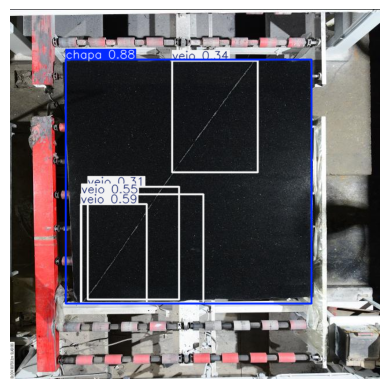

Imagem salva em: runs/detections/images/cropped_2_1_033733_003_PRETO-SAO-GABRIEL_jpg.rf.a2f18b20eb81e56626b14b353ee37bde.jpg



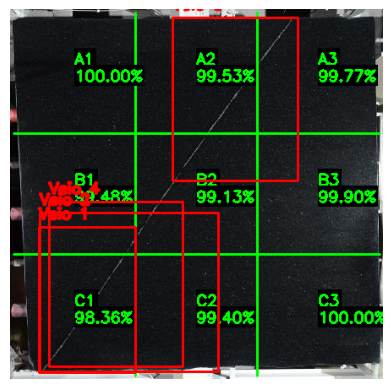

In [160]:
# Funções para execução da detecção conforme parâmetros.

# Carregar os nomes das classes a partir do arquivo YAML
class_names = load_class_names(yaml_path)

# Carregar o modelo YOLOv8
model = YOLO(model_path)
model.to(device)  # Envia o modelo para o dispositivo especificado (MPS ou CPU)

# Fazer a detecção na imagem especificada, suprimindo a saída
with suppress_output():
    results = model(image_path)

# Acessa as caixas delimitadoras dos resultados da detecção
detections = results[0].boxes

# Contadores para identificar defeitos de forma única
defect_counters = {
    'veio': 0,
    'furo': 0,
    'outro': 0  # Adicione outros tipos de defeitos conforme necessário
}

# Informações de desempenho
performance_info = [
    ["Arquivo da Imagem", image_path],
    ["Shape da Imagem", results[0].orig_shape],
    ["Chapas Detectadas", sum(1 for box in detections if int(box.cls[0]) == 0)],
    ["Furos Detectados", sum(1 for box in detections if int(box.cls[0]) == 2)],
    ["Veios Detectados", sum(1 for box in detections if int(box.cls[0]) == 1)]
]

# Mostra as informações de desempenho
print(tabulate(performance_info, headers=["Parâmetro", "Valor"], tablefmt="grid"))

# Obtém as dimensões da imagem
image = cv2.imread(image_path)
height, width, _ = image.shape

# Encontra a área da chapa (classe 0)
chapa_box = None
for box in detections:
    if int(box.cls[0]) == 0:
        chapa_box = box
        break

if chapa_box:
    # Coordenadas da chapa
    cx1, cy1, cx2, cy2 = map(int, chapa_box.xyxy[0])
    
    # Expande a área da chapa com base na margem percentual
    margin_w = int((cx2 - cx1) * margin_percentage)
    margin_h = int((cy2 - cy1) * margin_percentage)
    cx1 = max(cx1 - margin_w, 0)
    cy1 = max(cy1 - margin_h, 0)
    cx2 = min(cx2 + margin_w, width)
    cy2 = min(cy2 + margin_h, height)
    
    # Ajusta as coordenadas de corte com base na margem de corte
    crop_margin_w = int((cx2 - cx1) * crop_margin_percentage)
    crop_margin_h = int((cy2 - cy1) * crop_margin_percentage)
    crop_cx1 = max(cx1 - crop_margin_w, 0)
    crop_cy1 = max(cy1 - crop_margin_h, 0)
    crop_cx2 = min(cx2 + crop_margin_w, width)
    crop_cy2 = min(cy2 + crop_margin_h, height)
    
    # Listas para armazenar os resultados formatados, os erros e os defeitos desconsiderados
    results_summary = []
    errors_summary = []
    disregarded_summary = []

    # Coleta as informações dos defeitos
    for box in detections:
        cls = int(box.cls[0].item())  # Classe do objeto detectado (convertido para inteiro)
        class_name = class_names[cls]  # Obter o nome da classe
        conf = float(box.conf[0].item())  # Confiança da detecção
        x1, y1, x2, y2 = map(int, box.xyxy[0].tolist())  # Coordenadas da caixa delimitadora (convertidas para inteiros)

        if cls != 0:  # Considera apenas defeitos (classes 1 a 3)
            if conf >= min_confidence_defect:
                # Verifica se o defeito está dentro da área da chapa expandida
                if cx1 <= x1 <= cx2 and cy1 <= y1 <= cy2 and cx1 <= x2 <= cx2 and cy1 <= y2 <= cy2:
                    quadrants_and_sizes = get_quadrants_and_sizes(x1, y1, x2, y2, cx1, cy1, cx2, cy2, rows, cols)
                    defect_counters[class_name] += 1
                    defect_id = f"{class_name}-{defect_counters[class_name]}"
                    friendly_id = f"{class_name.capitalize()} {defect_counters[class_name]}"
                    for quadrant, size in quadrants_and_sizes.items():
                        # Armazena a classe, a confiança, as coordenadas da caixa delimitadora e o quadrante
                        results_summary.append({
                            "id": defect_id,
                            "quadrant": quadrant,
                            "class": class_name,
                            "confidence": conf,
                            "penalty": size * penalties[class_name],
                            "coordinates": {"x1": x1, "y1": y1, "x2": x2, "y2": y2},
                            "quadrants": quadrants_and_sizes
                        })
                else:
                    errors_summary.append({
                        "class": class_name,
                        "confidence": conf,
                        "coordinates": {"x1": x1, "y1": y1, "x2": x2, "y2": y2}
                    })
            else:
                disregarded_summary.append({
                    "class": class_name,
                    "confidence": conf,
                    "coordinates": {"x1": x1, "y1": y1, "x2": x2, "y2": y2}
                })

    # Calcular a pontuação da chapa e dos quadrantes
    score, quadrant_scores = calculate_score(results_summary, rows, cols)

    # Ordena os resultados pelo quadrante
    results_summary.sort(key=lambda x: x["quadrant"])

    # Exibir informações detalhadas formatadas
    print("\nParâmetros Utilizados:")
    parametros_utilizados = [
        ["Imagem", image_dir],
        ["Nome do Arquivo", image_file],
        ["Bloco", bloco_num],
        ["Chapa", chapa_num],
        ["Pedra/Rocha", pedra_nome],
        ["Linhas", rows],
        ["Colunas", cols],
        ["Margem", f"{margin_percentage * 100}%"],
        ["Confiança mínima", min_confidence_defect],
        ["Margem de corte", f"{crop_margin_percentage * 100}%"]
    ]
    print(tabulate(parametros_utilizados, headers=["Parâmetro", "Valor"], tablefmt="grid"))

    print(f"Pontuação da chapa: {score:.2f}%\n")

    print("Resultados da detecção:")
    if results_summary:
        resultados_deteccao = [
            ["ID", "Quadrante", "Classe", "Confiança", "Penalidade", "Coordenadas"]
        ]
        for result in results_summary:
            penalty = result['penalty'] if 'penalty' in result else 0
            resultados_deteccao.append([
                result['id'], result['quadrant'], result['class'], f"{result['confidence']:.2f}", f"{penalty:.2f}",
                f"({result['coordinates']['x1']}, {result['coordinates']['y1']}), ({result['coordinates']['x2']}, {result['coordinates']['y2']})"
            ])
        print(tabulate(resultados_deteccao, headers="firstrow", tablefmt="grid"))
    else:
        print("Nenhum defeito foi detectado na chapa.\n")

    # Exibir erros que estavam fora da chapa
    if errors_summary:
        print("\nErros fora da chapa:")
        erros_fora_chapa = [
            ["Classe", "Confiança", "Coordenadas"]
        ]
        for error in errors_summary:
            erros_fora_chapa.append([
                error['class'], f"{error['confidence']:.2f}",
                f"({error['coordinates']['x1']}, {error['coordinates']['y1']}), ({error['coordinates']['x2']}, {error['coordinates']['y2']})"
            ])
        print(tabulate(erros_fora_chapa, headers="firstrow", tablefmt="grid"))
    else:
        print("Nenhum erro fora da chapa foi detectado.\n")

    # Exibir defeitos desconsiderados por confiança mínima
    if disregarded_summary:
        print("\nDefeitos desconsiderados por confiança mínima:")
        defeitos_desconsiderados = [
            ["Classe", "Confiança", "Coordenadas"]
        ]
        for disregarded in disregarded_summary:
            defeitos_desconsiderados.append([
                disregarded['class'], f"{disregarded['confidence']:.2f}",
                f"({disregarded['coordinates']['x1']}, {disregarded['coordinates']['y1']}), ({disregarded['coordinates']['x2']}, {disregarded['coordinates']['y2']})"
            ])
        print(tabulate(defeitos_desconsiderados, headers="firstrow", tablefmt="grid"))
    else:
        print("Nenhum defeito foi desconsiderado por confiança mínima.\n")

    # Salvar apenas os defeitos que atendem aos critérios no JSON
    output_data = {
        image_file: {
            "results": results_summary,
            "score": f"{score:.2f}%",
            "bloco": bloco_num,
            "chapa": chapa_num,
            "pedra": pedra_nome,
            "output_image": output_image_file,  # Caminho da imagem de saída
            "cropped_image": cropped_image_file  # Caminho da imagem recortada
        }
    }

    # Verificar se o arquivo JSON já existe
    if os.path.exists(json_filename):
        # Carregar dados existentes
        with open(json_filename, 'r') as json_file:
            existing_data = json.load(json_file)
        # Atualizar ou adicionar os novos resultados
        existing_data[image_file] = output_data[image_file]
        output_data = existing_data

    # Salvar os resultados atualizados em um arquivo JSON
    with open(json_filename, 'w') as json_file:
        json.dump(output_data, json_file, indent=4)

    print(f"Resultados salvos em '{json_filename}'\n")

    # Plota a imagem com as detecções marcadas
    result_image = results[0].plot()

    # Salva a imagem resultante
    cv2.imwrite(output_image_file, result_image)
    print(f"Imagem salva em: {output_image_file}\n")

    # Converte a imagem de BGR (usado pelo OpenCV) para RGB (usado pelo Matplotlib) e exibe a imagem YOLO
    plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')  # Desativa os eixos
    plt.show()  # Mostra a imagem YOLO

    # Recorta a imagem original para mostrar apenas a área da chapa com a margem
    cropped_image = image[crop_cy1:crop_cy2, crop_cx1:crop_cx2]

    # Desenha os quadrantes e defeitos considerados na imagem recortada
    quadrant_width = (cx2 - cx1) // cols
    quadrant_height = (cy2 - cy1) // rows
    for i in range(1, cols):
        cv2.line(cropped_image, (cx1 + i * quadrant_width - crop_cx1, cy1 - crop_cy1), (cx1 + i * quadrant_width - crop_cx1, cy2 - crop_cy1), (0, 255, 0), 2)
    for i in range(1, rows):
        cv2.line(cropped_image, (cx1 - crop_cx1, cy1 + i * quadrant_height - crop_cy1), (cx2 - crop_cx1, cy1 + i * quadrant_height - crop_cy1), (0, 255, 0), 2)

    # Adiciona o nome dos quadrantes e a pontuação na imagem recortada
    quadrant_names = generate_quadrant_names(rows, cols)
    for i, name in enumerate(quadrant_names):
        qx = cx1 + (i % cols) * quadrant_width + quadrant_width // 2 - crop_cx1
        qy = cy1 + (i // cols) * quadrant_height + quadrant_height // 2 - crop_cy1
        put_text_with_background(cropped_image, name, (qx, qy - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2, (0, 0, 0))
        put_text_with_background(cropped_image, f"{quadrant_scores[name]:.2f}%", (qx, qy + 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2, (0, 0, 0))

    # Adiciona as caixas delimitadoras dos defeitos considerados na imagem recortada
    for result in results_summary:
        x1 = result['coordinates']['x1'] - crop_cx1
        y1 = result['coordinates']['y1'] - crop_cy1
        x2 = result['coordinates']['x2'] - crop_cx1
        y2 = result['coordinates']['y2'] - crop_cy1
        cv2.rectangle(cropped_image, (x1, y1), (x2, y2), (0, 0, 255), 2)
        cv2.putText(cropped_image, f"{result['class'].capitalize()} {result['id'].split('-')[-1]}", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2, cv2.LINE_AA)

    # Salva a imagem recortada
    cv2.imwrite(cropped_image_file, cropped_image)
    print(f"Imagem salva em: {cropped_image_file}\n")

    # Converte a imagem de BGR (usado pelo OpenCV) para RGB (usado pelo Matplotlib) e exibe a imagem recortada
    plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')  # Desativa os eixos
    plt.show()  # Mostra a imagem recortada

else:
    print("Nenhuma chapa (classe 0) foi detectada na imagem.")
